# Full data frame EDA
## Plotting in map form

In [1]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

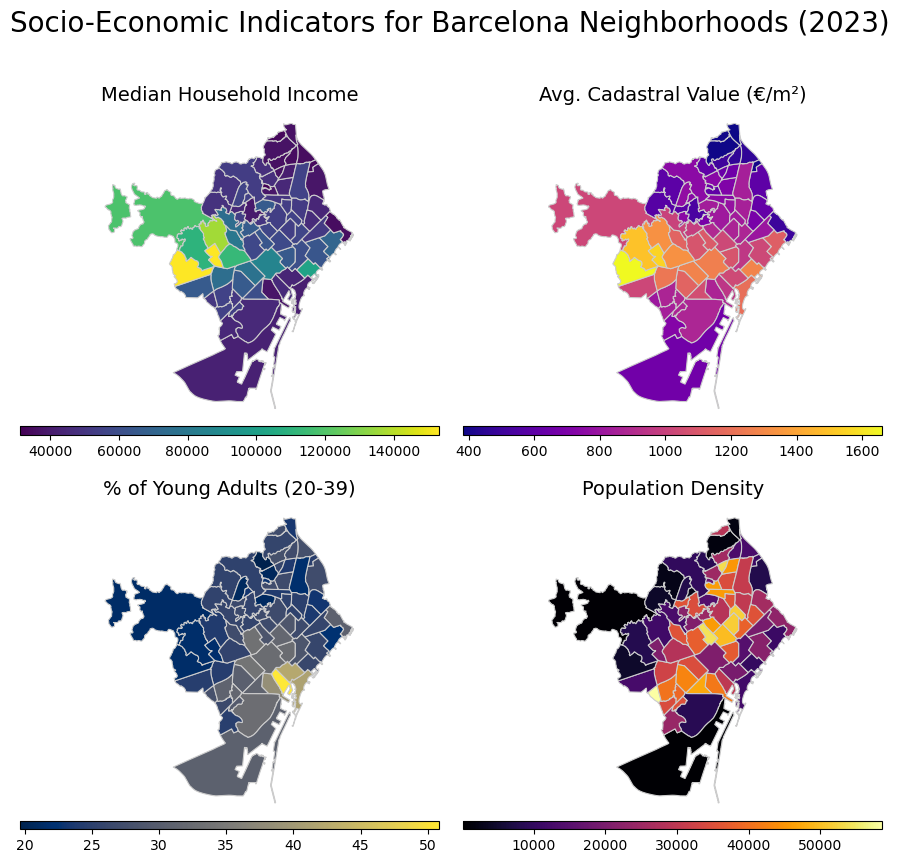

In [2]:


# --- 1. Load and Prepare the Data (No changes here) ---
master_df = pd.read_csv("../data/preprocessed/barcelona/barcelona_master_dataframe.csv")
master_df['geometry'] = master_df['geometry'].apply(wkt.loads)

# Create the GeoDataFrame with the correct initial CRS
master_gdf = gpd.GeoDataFrame(master_df, geometry='geometry', crs='epsg:25831')

# Transform to lat/lon for standard plotting
master_gdf = master_gdf.to_crs(epsg=4326)

# Filter for the latest year
latest_year_gdf = master_gdf[master_gdf['year'] == master_gdf['year'].max()].copy()
latest_year = latest_year_gdf['year'].iloc[0]


# --- 2. Create the Grid Plot (with your customizations) ---

# We create a dictionary where each entry contains all the info for one map.
plots = {
    'median_household_income': {
        'title': 'Median Household Income',
        'cmap': 'viridis'  # The default, good for sequential data
    },
    'avg_price_per_m2': {
        'title': 'Avg. Cadastral Value (€/m²)',
        'cmap': 'plasma'   # The original color for this plot
    },
    'pct_young_adults': {
        'title': '% of Young Adults (20-39)',
        'cmap': 'cividis'  # The original color for this plot
    },
    'population_density': {
        'title': 'Population Density',
        'cmap': 'inferno'  # The original color for this plot
    }
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

# Flatten the axes array for easy looping
axes = axes.flatten()

# Loop through our new 'plots' dictionary to create each map
for i, (column, plot_info) in enumerate(plots.items()):
    ax = axes[i]
    latest_year_gdf.plot(
        column=column,
        ax=ax,
        legend=True,
        cmap=plot_info['cmap'],  # Use the custom colormap
        linewidth=0.8,
        edgecolor='0.8',
        legend_kwds={'orientation': "horizontal", 'pad': 0.01, 'aspect': 50}
    )
    ax.set_title(plot_info['title'], fontsize=14) # Use the custom title
    ax.axis('off')

# Add a main title to the entire figure
fig.suptitle(f'Socio-Economic Indicators for Barcelona Neighborhoods ({latest_year})', fontsize=20)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Numerical overview

In [3]:

# Load your master dataframe (no geometry needed for this)
master_df = pd.read_csv("../data/preprocessed/barcelona/barcelona_master_dataframe.csv")

print("--- Statistical Summary of Your Master DataFrame ---")
# Using .T to transpose the output for easier reading
print(master_df.describe().T)

print("\n--- Data Types and Non-Null Counts ---")
master_df.info()

--- Statistical Summary of Your Master DataFrame ---
                         count          mean           std           min  \
year                     438.0  2.020500e+03  1.709778e+00  2.018000e+03   
median_property_price    438.0  5.818947e+07  3.803025e+07  1.704161e+07   
avg_price_per_m2         438.0  8.595371e+02  2.819234e+02  3.829000e+02   
median_household_income  438.0  5.168133e+04  2.295937e+04  2.660500e+04   
pct_higher_education     438.0  3.180326e+01  1.369382e+01  8.183633e+00   
population_density       438.0  2.539875e+04  1.545490e+04  6.742768e+01   
pct_young_adults         438.0  2.709468e+01  5.252398e+00  1.923134e+01   

                                  25%           50%           75%  \
year                     2.019000e+03  2.020500e+03  2.022000e+03   
median_property_price    3.175975e+07  4.789640e+07  7.114550e+07   
avg_price_per_m2         6.451750e+02  8.380250e+02  1.031855e+03   
median_household_income  3.727712e+04  4.592475e+04  5.571500e

## Plotting numerical values on boxplots

Saved bcn_boxplots.png
Saved bcn_choropleth_grid.png


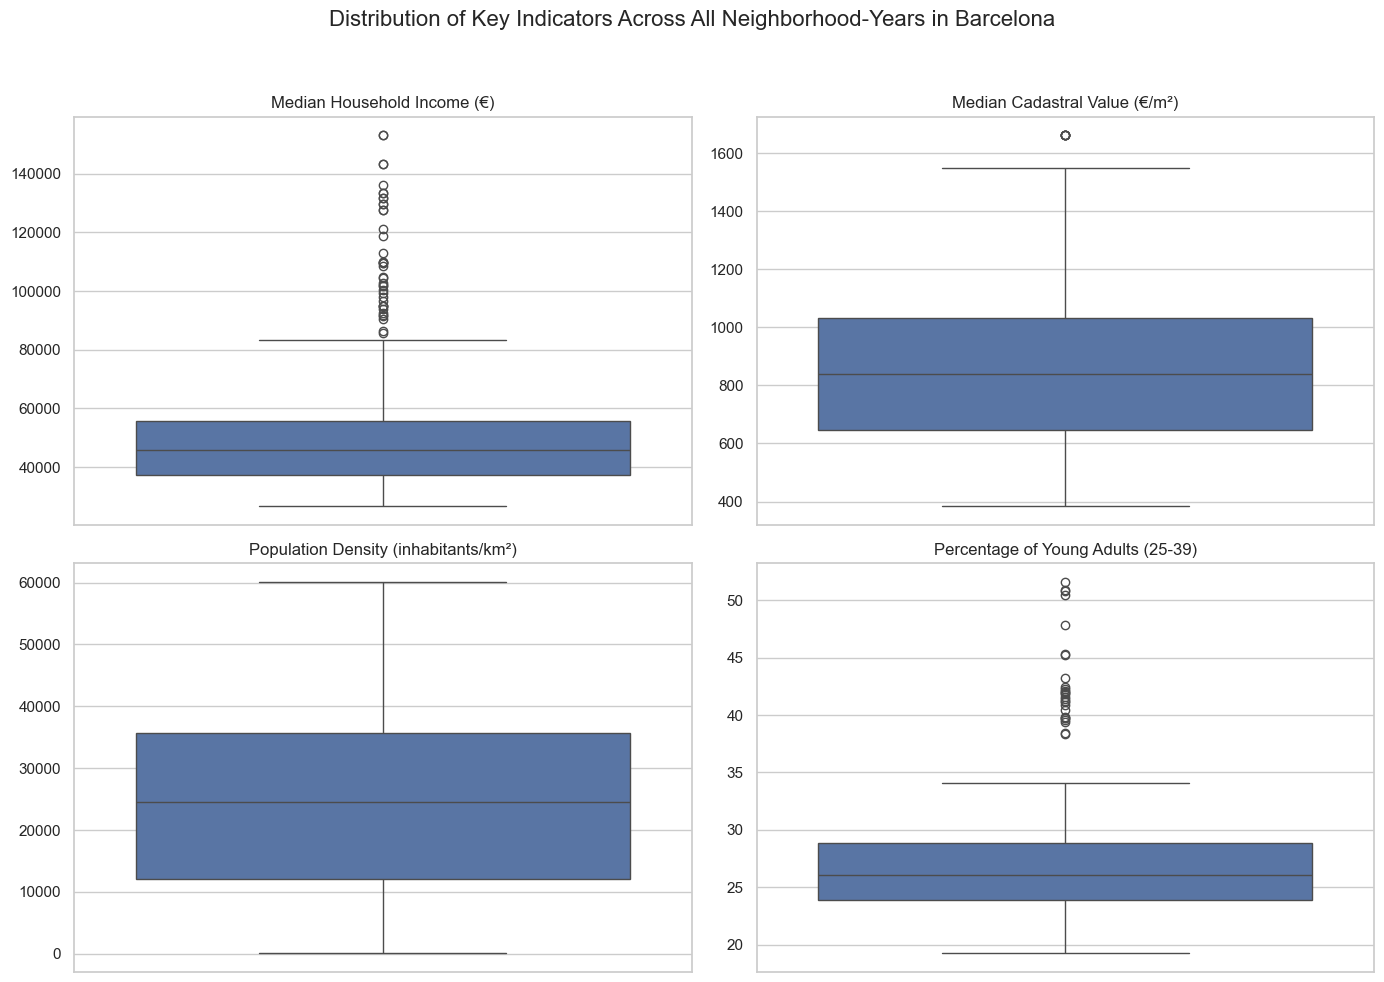

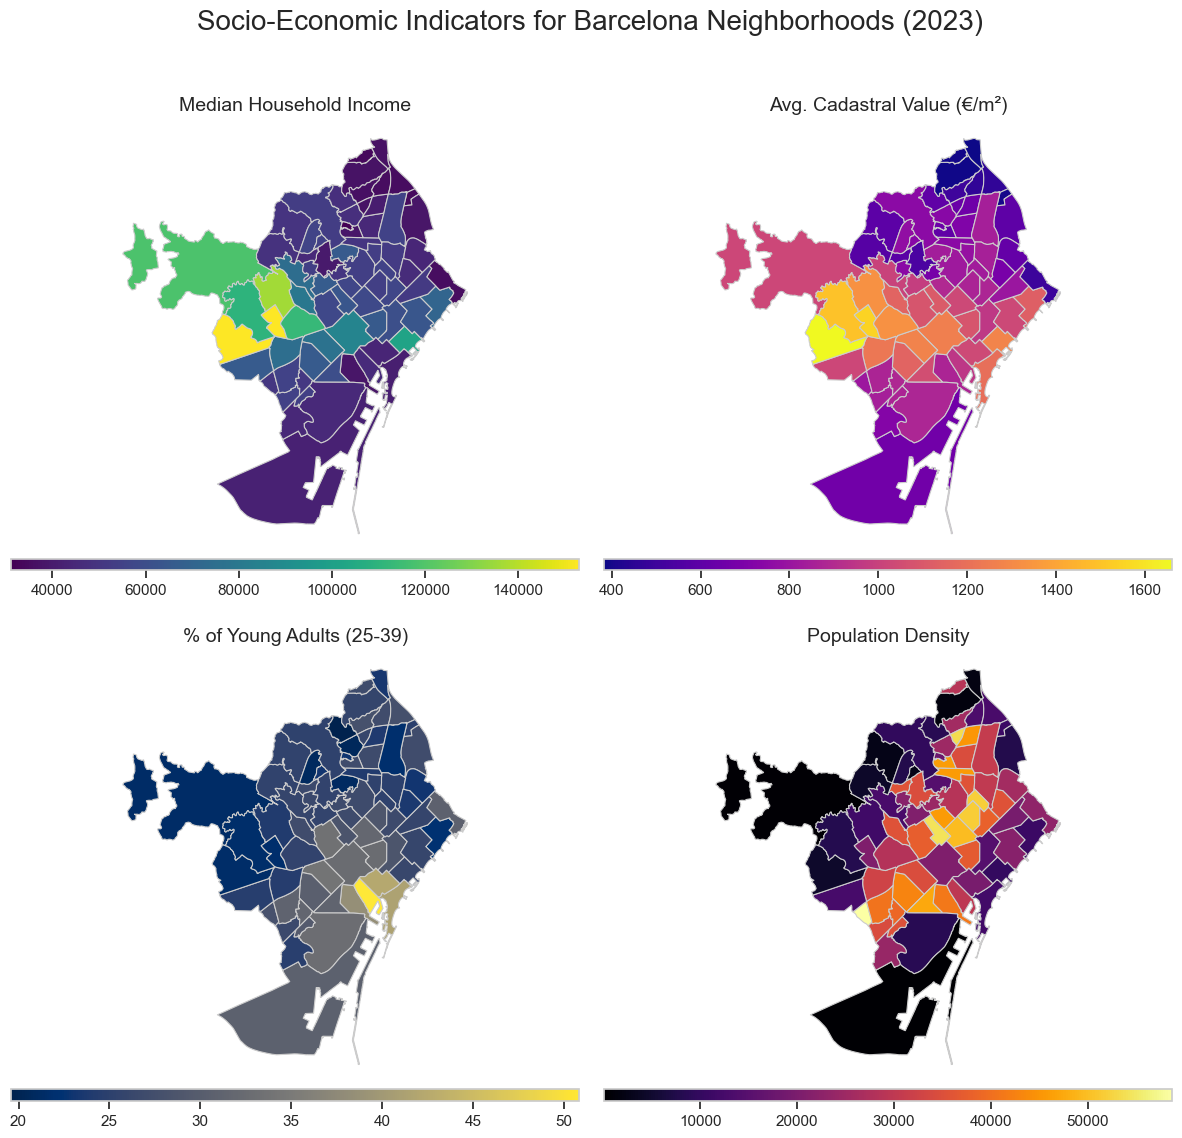

In [5]:
# Set plot style
sns.set_theme(style="whitegrid")

# --- 1. Load and Prepare the Data ---
# Make sure you are using your final, inner-joined master dataframe
master_df = pd.read_csv("../data/preprocessed/barcelona/barcelona_master_dataframe.csv") # Assuming this is the name
master_df['geometry'] = master_df['geometry'].apply(wkt.loads)

# Create the GeoDataFrame with the correct initial CRS
master_gdf = gpd.GeoDataFrame(master_df, geometry='geometry', crs='epsg:25831')
master_gdf = master_gdf.to_crs(epsg=4326) # Transform to lat/lon for plotting

# --- 2. Generate and Save Boxplots ---
fig_box, axes_box = plt.subplots(2, 2, figsize=(14, 10))
fig_box.suptitle('Distribution of Key Indicators Across All Neighborhood-Years in Barcelona', fontsize=16)
axes_box = axes_box.flatten()

# Plot 1: Median Household Income
sns.boxplot(y=master_gdf['median_household_income'], ax=axes_box[0])
axes_box[0].set_title('Median Household Income (€)')
axes_box[0].set_ylabel('')

# Plot 2: Median Cadastral Value per m²
sns.boxplot(y=master_gdf['avg_price_per_m2'], ax=axes_box[1])
axes_box[1].set_title('Median Cadastral Value (€/m²)')
axes_box[1].set_ylabel('')

# Plot 3: Population Density
sns.boxplot(y=master_gdf['population_density'], ax=axes_box[2])
axes_box[2].set_title('Population Density (inhabitants/km²)')
axes_box[2].set_ylabel('')

# Plot 4: Percentage of Young Adults
sns.boxplot(y=master_gdf['pct_young_adults'], ax=axes_box[3])
axes_box[3].set_title('Percentage of Young Adults (25-39)')
axes_box[3].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('bcn_boxplots.png', dpi=300)
print("Saved bcn_boxplots.png")

# --- 3. Generate and Save Choropleth Grid ---
latest_year_gdf = master_gdf[master_gdf['year'] == master_gdf['year'].max()].copy()
latest_year = latest_year_gdf['year'].iloc[0]

plots = {
    'median_household_income': {'title': 'Median Household Income', 'cmap': 'viridis'},
    'avg_price_per_m2': {'title': 'Avg. Cadastral Value (€/m²)', 'cmap': 'plasma'},
    'pct_young_adults': {'title': '% of Young Adults (25-39)', 'cmap': 'cividis'},
    'population_density': {'title': 'Population Density', 'cmap': 'inferno'}
}

fig_map, axes_map = plt.subplots(2, 2, figsize=(12, 12))
axes_map = axes_map.flatten()

for i, (column, plot_info) in enumerate(plots.items()):
    ax = axes_map[i]
    latest_year_gdf.plot(
        column=column, ax=ax, legend=True, cmap=plot_info['cmap'],
        linewidth=0.8, edgecolor='0.8',
        legend_kwds={'orientation': "horizontal", 'pad': 0.01, 'aspect': 50}
    )
    ax.set_title(plot_info['title'], fontsize=14)
    ax.axis('off')

fig_map.suptitle(f'Socio-Economic Indicators for Barcelona Neighborhoods ({latest_year})', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('bcn_choropleth_grid.png', dpi=300)
print("Saved bcn_choropleth_grid.png")